# Loss Functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

## Loss functions

เราสามารถเขียนสมการของ OLS regression ได้ดังนี้

$$y = h(X, \beta) + \text{error}$$

- $h(X, \beta) = \beta_0 + \beta_1\boldsymbol{x}_1 + \beta_2\boldsymbol{x}_2 + ...$ เรียกว่า <b>hypothesis function</b> (ฟังก์ชันที่แปลงจาก input เป็น prediction)
- $\hat{y} = h(X, \beta)$ เป็น prediction

`.fit` method ใน `scikit-learn` มีหน้าที่ทำให้ error ต่ำสุด error นี้คือ <b>loss function</b> ($L(\text{error})$)
- Loss function มีหลายแบบ แต่สำหรับ OLS regression เราใช้ $L = ||\text{error}||^2 = ||y - \hat{y}||^2$
- Loss function ใช้ในการ fit model ซึ่งต่างจาก performance metric ที่ใช้วัด performance ของ model หลังการ fit
- Loss function กับ performance metric อาจเหมือนกันในบางครั้ง เช่น MSE
- อย่างไรก็ตาม loss function ต้องเป็น smooth function เพื่อที่เราจะสามารถ diff เพื่อหาค่าต่ำสุดได้

## Optimisation

<b>Optimisation</b> คือการหาชุด trainable parameter ที่ทำให้ loss function ($L$) มีค่าต่ำสุด (global minima) เราเรียกวิธีที่ใช้ทำ optimisation ว่า <b>solver</b>

### Gradient descent

Gradient descent (steepest descent) เป็น optimisation วิธีหนึ่ง หลักการคือ กำหนด parameter เริ่มต้น แล้วปรับมันไปในทิศทางตรงข้ามกับ gradient ของ loss function เพื่อเข้าใกล้ local minima ของ loss function

<img src="../images/gradient_descent.png" width="350" /><br />

Gradient descent มีขั้นตอนดังนี้ (พิจารณา trainable parameter ตัวเดียวก่อน ($\beta_0$) เพื่อความง่าย)
- กำหนดค่าเริ่มต้นของ $\beta_0$
- หา gradient ($\frac{\partial L}{\partial\beta_0}$) ที่จุด $\beta_0$
- ปรับค่า $\beta_0$ ค่าที่เปลี่ยนไปจะขึ้นกับ gradient และ step size (<b>learning rate</b> ($\eta$))

$$\beta_0^{(k+1)} = \beta_0^{(k)} - \eta\frac{\partial L}{\partial\beta_0} (\beta_0^{(k)})$$

- รอบของการอัพเดต parameter โดยใช้ training set ครบทั้งชุด 1 ครั้ง เรียกว่า <b>epoch</b>
- ทำไปเรื่อย ๆ จนเข้าสู่เกณฑ์ที่จะหยุด (stopping criterion) เช่น gradient เข้าใกล้ 0 มากพอ หรือ จำนวน epoch ครบตามกำหนด

เราต้องกำหนด learning rate ($\eta$) ให้พอดี (เป็น hyperparameter)
- ถ้า $\eta$ น้อยไป ต้องทำ epoch มากขึ้น และอาจติดอยู่ใน local minima เดียว
- ถ้า $\eta$ มากไป อาจวนอยู่รอบ minima นาน หรืออาจลู่ออกจาก minima ก็ได้
    
<img src="../images/gradient_descent_different_steps.png" width="800" /><br />

การทำ feature scaling จะช่วยให้ loss function converge เข้าสู่ local minima เร็วขึ้น

ถ้าเรา optimise 2 parameter พร้อมกัน ($\beta_0$, $\beta_1$) loss function จะเป็น surface plot เราเรียกมันว่า <b>energy landscape</b>

Gradient descent สามารถถูก generalised ให้ optimise ทุก parameter พร้อมกันได้ สำหรับ OLS regression ที่มี trainable parameter ได้แก่ $\beta_0$ ถึง $\beta_n$ (เขียนรวมกันได้เป็นเวกเตอร์ $\boldsymbol{\beta}$) เราสามารถทำ gradient descent ได้ดังนี้

$$\boldsymbol{\beta}^{(k+1)} = \boldsymbol{\beta}^{(k)} - \eta\nabla L(\boldsymbol{\beta}^{(k)})$$

หาก dataset มีขนาดใหญ่ แล้วเราอัพเดต trainable parameter ทุกตัวโดยใช้ข้อมูลทั้งชุด จะทำให้ computationally expensive (เรียกว่า <b>batch gradient descent</b>) เราสามารถปรับปรุง  gradient descent ได้ดังนี้
- Classical <b>Stochastic Gradient Descent (SGD)</b>
    - สุ่มเลือกข้อมูลมา 1 จุด คำนวณ gradient โดยใช้ข้อมูลจุดนั้น และใช้ gradient ที่ได้ไปอัพเดต trainable parameter ทุกตัว ทำแบบนี้จนใช้ข้อมูลครบทุกจุด จึงจะครบ 1 epoch
    - ใช้ `sklearn.linear_model.SGDRegressor` หรือ `sklearn.linear_model.SGDClassifier`
- <b>Mini-batch Gradient Descent</b>
    - แบ่ง dataset ออกเป็นหลาย ๆ ชุด (mini-batch) เลือกมา 1 ชุด คำนวณ gradient โดยใช้ข้อมูลชุดนั้น และใช้ gradient ที่ได้ไปอัพเดต trainable parameter ทุกตัว ทำแบบนี้จนใช้ข้อมูลครบทุกชุด จึงจะครบ 1 epoch
    
ทั้งสองวิธีข้างต้นคำนวณ gradient โดยใช้ข้อมูลบางส่วน ดังนั้นค่าของ loss function จะ fluctuate จาก epoch หนึ่งไปอีก epoch หนึ่ง โดยที่ SGD จะ fluctuate มากกว่า

ข้อดีของ SGD เทียบกับ mini-batch gradient descent เช่น
- เร็วกว่าเมื่อใช้ dataset ขนาดใหญ่
- ไม่ติดอยู่ใน local minima เดิม
- ใช้ RAM น้อยกว่า

ข้อเสียของ SGD เทียบกับ mini-batch gradient descent เช่น 
- ต้องเพิ่ม epoch 
- อาจจะไม่ converge
- อาจช้ากว่าเมื่อใช้ dataset ขนาดเล็ก

<img src="../images/batch_and_stochastic_gd.png" width="600" /><br />

In [2]:
# Data pre-processing

# Import data and drop duplicates
data = pd.read_csv('../data/fish.csv').drop_duplicates()
# Use only "Width" feature and normalise it
X = MinMaxScaler().fit_transform(data[['Width']])
# Use "Height" as the label
y = data['Height']

In [3]:
# Create models
lr = LinearRegression().fit(X, y)  # linear regressor
sgd = SGDRegressor(loss='squared_error', eta0=0.5).fit(X, y)  # SGD regressor

In [4]:
# Weight (beta_1)
sgd.coef_

array([14.22442301])

In [5]:
# Bias (beta_0)
sgd.intercept_

array([2.6232631])

In [6]:
# Print the equation of each of the models (y_pred = beta0 + beta1.x)
print("Linear regressor:", f"y = {lr.intercept_} + {lr.coef_[0]}x")
print("SGD regressor:", f"y = {sgd.intercept_[0]} + {sgd.coef_[0]}x")

Linear regressor: y = 2.177560230008516 + 14.30177197137537x
SGD regressor: y = 2.6232630987285446 + 14.224423005156796x


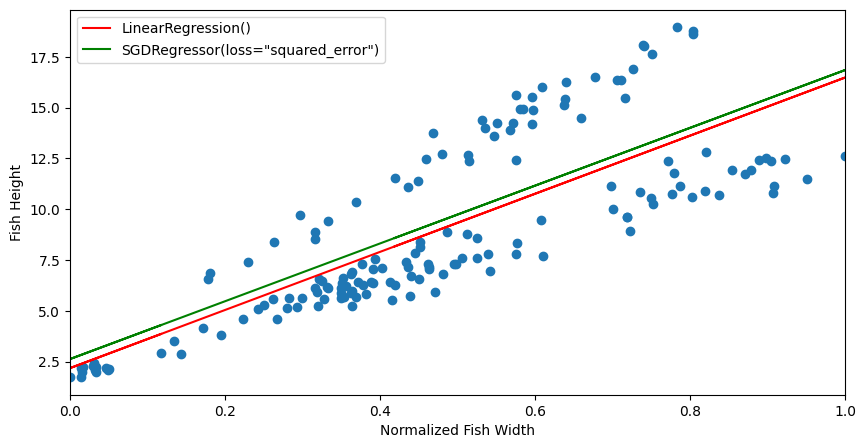

In [7]:
# Plot data and prediction
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, y)  # Plot data
ax.plot(X, lr.predict(X), c='r', label='LinearRegression()')  # Plot prediction from the linear regressor
ax.plot(X, sgd.predict(X), c='g', label='SGDRegressor(loss="squared_error")')  # Plot prediction from the SGD regressor
ax.set(xlabel="Normalized Fish Width", ylabel="Fish Height", xlim=(0, 1))
ax.legend();

### Second-order (Hessian) optimisation

Gradient descent เป็น first-order optimisation มีวิธี optimisation ที่ converge เร็วกว่า คือ second-order (Hessian) optimisation (เช่น Newton's method, Quasi-Newton's method (e.g., Limited-memory Broyden–Fletcher–Goldfarb–Shanno algorithm (L-BFGS)))

## Regression loss functions

Loss function ที่ใช้ใน regression task เช่น

- $L_1$ (MAE) loss
    - ข้อเสียคือ ต้องปรับ learning rate ให้น้อยลงเรื่อย ๆ ขณะลู่เข้า

$$L_1 = \text{MAE} = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|$$

$\quad\quad\quad y_i$ = true label <br />
$\quad\quad\quad \hat{y}_i$ = predicted label <br />
$\quad\quad\quad n$ = จำนวนข้อมูล

- $L_2$ (MSE) loss
    - ข้อเสียคือ Very sensitive to outliers

$$L_2 = \text{MSE} = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2$$

$\quad\quad\quad y_i$ = true label <br />
$\quad\quad\quad \hat{y}_i$ = predicted label <br />
$\quad\quad\quad n$ = จำนวนข้อมูล

- Huber loss (mixed $L_1$ and $L_2$, smooth absolute, smooth $L_1$)
    - ข้อดีคือ
        - Adjustable for outliers 
        - Slope บ่งบอกว่าเราเข้าใกล้ minima แล้วหรือไม่

$$L_{\delta} = \left\{
    \begin{array}{lr}
        \frac{1}{n}\sum_{i=1}^n \frac{1}{2}(y - \hat{y})^{2} & : |y - \hat{y}| \leq \delta\\
        \frac{1}{n}\sum_{i=1}^n \delta\cdot\left(|y-\hat{y}|-\frac{\delta}{2}\right) & :  |y - \hat{y}| > \delta
    \end{array}
\right.$$

$\quad\quad\quad y_i$ = true label <br />
$\quad\quad\quad \hat{y}_i$ = predicted label <br />
$\quad\quad\quad n$ = จำนวนข้อมูล <br />
$\quad\quad\quad \delta$ = จุดที่ loss function เปลี่ยนจาก quadratic เป็น linear (ดูกราฟด้านล่างประกอบ)

Loss function เหล่านี้มีลักษณะดังกราฟ

<img src="../images/regression_loss.png" width="400" /><br />

## Classification loss functions

พิจารณา binary classification ซึ่งมีผลจากการทำนาย (outcome) เป็นได้แค่ 0 กับ 1 หากใช้ MAE หรือ MSE จะได้ error เท่ากับ 1 เราควรใช้ loss function ที่มี penalty เมื่อทำนายผิดมากกว่านี้ ดังนั้น MAE หรือ MSE จึงเป็น loss function ที่ไม่เหมาะกับ classification task

Loss function ที่ใช้ใน classification task คือ <b>log loss (cross-entropy loss)</b>

$$L_{CE} = \sum_{i=0}^{N-1} y_i \log{(\hat{y}_i)}$$

$\quad y_i$ = true probability ของ sample หนึ่งที่จะอยู่ใน class $i$ (เท่ากับ 0 หรือ 1 สำหรับ binary classification) <br />
$\quad \hat{y}_i$ = predicted probability ของ sample นั้นที่อยู่ใน class $i$ (คำนวณโดยใช้ sigmoid สำหรับ binary classification) <br />
$\quad N$ = จำนวน class

<img src="../images/log_loss.png" width="800" /><br />

## Regularisation

หาก validation accuracy ต่ำกว่า training accuracy (หรือ validation loss สูงกว่า training loss) แสดงว่าเราได้ overfitting model 

<img src="../images/learning_curve_overfitting.png" width="700" /><br />

วิธีการหนึ่งที่แก้ overfitting ได้ คือ regularisation

Regularisation คือการปรับค่า (penalise) parameter ใน model เพราะบาง parameter มีขนาดใหญ่ และ loss ของ model นั้นแปรผันตามขนาดของ parameter

$$\text{Regularized Loss} = \text{Loss}(X,y, \beta) + \text{Penalty}(\beta)$$

Regularisation ทำให้ parameter บางตัวมีขนาดเล็กลงหรือเป็น 0 (ถูกเอาออก) เพื่อ<b style="color: #32a852">ป้องกัน overfitting</b>

Regularisation มี 2 วิธีที่นิยม ได้แก่
- Lasso (L1) ใช้ `sklearn.linear_model.Lasso`

$$\text{L1} = \text{Loss}  + \alpha \sum_{i=1}^n |\beta_i|$$

- Ridge (L2) ใช้ `sklearn.linear_model.Ridge`

$$\text{L2} = \text{Loss}  + \alpha \sum_{i=1}^n (\beta_i)^2$$

ข้อสังเกต
- $\alpha$ คือ <b>regularisation strength</b>
    - เป็น hyperparameter ตัวหนึ่งที่กำหนดว่า model จะถูก penalized มากแค่ไหน (ถ้า $\alpha$ มีขนาดใหญ่ จะลด complexity และ variance ของ model แต่จะมีความ bias มากขึ้น)
    - เราควรเลือกค่าที่ทำให้ validation accuracy กับ training accuracy ใกล้เคียงกัน แต่ accuracy ก็ต้องมากที่สุดเท่าที่จะทำได้ด้วย
    
<img src="../images/regularisation.png" width="350" /><br />

- สังเกตว่าพจน์ sum เริ่มจาก $i=1$ นั่นหมายความว่า intercept ($\beta_0$) ไม่ถูก penalised

<span style="color: red">อย่าลืมทำ feature scaling ก่อนทำ regularisation</span>